# **MOVIE RECOMMENDATION SYSTEM USING KNN** 

##DATASET USED : MOVIELENS

##PROJECT DONE BY:


1.   MAALOLAN K   -   18BLC1077
2.   AKSHARAA G   -   18BLC1059
3.   NIKITA RATH  -   18BLC1131



In [0]:
#Importing Dependencies
import numpy as np
import pandas as pd

In [7]:
ratings = pd.read_csv('ratings.csv')
len(ratings)

281056

In [8]:
ratings = ratings[['userId', 'movieId','rating']]
len(ratings['userId'].unique())


1931

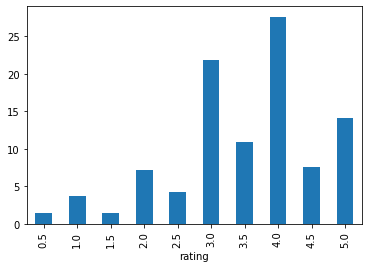

In [9]:
count_ratings = ratings.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)
count_ratings
count_ratings['perc_total'].plot.bar()

In [11]:
movie_list = pd.read_csv('movies.csv')
len(movie_list)

27278

In [12]:
movie_list.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
genres = movie_list['genres']
genres.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [14]:
genre_list = ""
for index,row in movie_list.iterrows():
        genre_list += row.genres + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['Thriller',
 'Animation',
 'Mystery',
 'Fantasy',
 'Film-Noir',
 'Crime',
 'Drama',
 'Western',
 'IMAX',
 'Sci-Fi',
 'Adventure',
 'War',
 'Children',
 'Musical',
 'Comedy',
 '(no genres listed)',
 'Action',
 'Romance',
 'Horror',
 'Documentary']

In [15]:
#Enriching the movies dataset by adding the various genres columns.
movies_with_genres = movie_list.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in _.genres), axis = 1)
movies_with_genres.head()

,movieId,title,genres,Thriller,Animation,Mystery,Fantasy,Film-Noir,Crime,Drama,Western,IMAX,Sci-Fi,Adventure,War,Children,Musical,Comedy,(no genres listed),Action,Romance,Horror,Documentary
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#Calculating the sparsity

In [16]:
no_of_users = len(ratings['userId'].unique())
no_of_movies = len(ratings['movieId'].unique())

sparsity = round(1.0 - len(ratings)/(1.0*(no_of_movies*no_of_users)),3)
print(sparsity)

0.987


# Counting the number of unique movies in the dataset.

In [17]:
len(ratings['movieId'].unique())

10897

# Finding the average rating for movie and the number of ratings for each movie


In [18]:
avg_movie_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
#avg_movie_rating['movieId']= avg_movie_rating.index
# inspecting the average movie rating data frame
avg_movie_rating.head()

,mean,count
movieId,,
1,3.980548,694
2,3.257282,309
3,3.151685,178
4,3.096774,31
5,3.136598,194


In [19]:
len(avg_movie_rating)

10897

In [20]:
#calculate the percentile count. It gives the no of ratings at least 70% of the movies have
np.percentile(avg_movie_rating['count'],70)

13.0

In [21]:
#Get the average movie rating across all movies 
avg_rating_all=ratings['rating'].mean()
avg_rating_all
#set a minimum threshold for number of reviews that the movie has to have
min_reviews=30
min_reviews
movie_score = avg_movie_rating.loc[avg_movie_rating['count']>min_reviews]
movie_score.head()

,mean,count
movieId,,
1,3.980548,694
2,3.257282,309
3,3.151685,178
4,3.096774,31
5,3.136598,194


In [22]:
len(movie_score)

1949

###Join movie details to movie ratings

In [23]:
movies_with_genres.index.name = None
movies_with_genres = movies_with_genres.rename_axis(None) 
movie_score = pd.merge(movie_score,movies_with_genres,on='movieId')
movie_score.head()

,movieId,mean,count,title,genres,Thriller,Animation,Mystery,Fantasy,Film-Noir,Crime,Drama,Western,IMAX,Sci-Fi,Adventure,War,Children,Musical,Comedy,(no genres listed),Action,Romance,Horror,Documentary
0,1,3.980548,694,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
1,2,3.257282,309,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,3,3.151685,178,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,4,3.096774,31,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
4,5,3.136598,194,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


###list top scored movies over the whole range of movies

In [24]:
pd.DataFrame(movie_score.sort_values(['mean'],ascending=False)[['title','count','mean','genres']][:10])

,title,count,mean,genres
174,"Shawshank Redemption, The (1994)",870,4.470690,Crime|Drama
39,"Usual Suspects, The (1995)",666,4.385886,Crime|Mystery|Thriller
375,"Godfather, The (1972)",565,4.375221,Crime|Drama
1606,City of God (Cidade de Deus) (2002),182,4.370879,Action|Adventure|Crime|Drama|Thriller
792,On the Waterfront (1954),68,4.360294,Crime|Drama
560,"Treasure of the Sierra Madre, The (1948)",68,4.345588,Action|Adventure|Drama|Western
500,Paths of Glory (1957),48,4.343750,Drama|War
1939,Intouchables (2011),37,4.324324,Comedy|Drama
390,Charade (1963),57,4.307018,Comedy|Crime|Mystery|Romance|Thriller
531,"Godfather: Part II, The (1974)",388,4.304124,Crime|Drama


In [0]:
# Gives the best movies according to genre based on mean rating
def best_movies_by_genre(genre,top_n):
    return pd.DataFrame(movie_score.loc[(movie_score[genre]==1)].sort_values(['mean'],ascending=False)[['title','count','mean']][:top_n])

###Top 10 Musical Movies

In [26]:
best_movies_by_genre('Musical',10)  

,title,count,mean
1893,Dr. Horrible's Sing-Along Blog (2008),56,4.232143
561,Duck Soup (1933),78,4.153846
1502,Fiddler on the Roof (1971),46,4.108696
381,Singin' in the Rain (1952),143,4.094406
940,Nashville (1975),37,4.054054
396,"Wizard of Oz, The (1939)",332,3.989458
1129,"Hard Day's Night, A (1964)",60,3.916667
1918,Scott Pilgrim vs. the World (2010),44,3.909091
1487,Hedwig and the Angry Inch (2000),31,3.903226
1189,"Commitments, The (1991)",74,3.891892


##Top 10 Action Movies

In [27]:
#run function to return top recommended movies by genre
best_movies_by_genre('Action',10)  

,title,count,mean
1606,City of God (Cidade de Deus) (2002),182,4.370879
560,"Treasure of the Sierra Madre, The (1948)",68,4.345588
1705,Band of Brothers (2001),58,4.275862
1872,"Dark Knight, The (2008)",264,4.238636
1157,Fight Club (1999),565,4.218584
838,Seven Samurai (Shichinin no samurai) (1954),159,4.210692
1583,"Professional, The (Le professionnel) (1981)",69,4.210145
511,Raiders of the Lost Ark (Indiana Jones and the...,623,4.202247
387,North by Northwest (1959),219,4.196347
1623,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,41,4.195122


##Top 10 Children Movies

In [28]:
#run function to return top recommended movies by genre
best_movies_by_genre('Children',10)  

,title,count,mean
1600,My Neighbor Totoro (Tonari no Totoro) (1988),65,4.207692
1623,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,41,4.195122
494,Wallace & Gromit: The Wrong Trousers (1993),191,4.159686
346,Wallace & Gromit: A Close Shave (1995),155,4.112903
1915,Toy Story 3 (2010),91,4.104396
1912,How to Train Your Dragon (2010),68,4.102941
1117,"Christmas Story, A (1983)",170,4.100000
1879,WALL·E (2008),172,4.052326
533,"Grand Day Out with Wallace and Gromit, A (1989)",92,4.005435
396,"Wizard of Oz, The (1939)",332,3.989458


##Top 10 Drama Movies

In [29]:
#run function to return top recommended movies by genre
best_movies_by_genre('Drama',10) 

,title,count,mean
174,"Shawshank Redemption, The (1994)",870,4.470690
375,"Godfather, The (1972)",565,4.375221
1606,City of God (Cidade de Deus) (2002),182,4.370879
792,On the Waterfront (1954),68,4.360294
560,"Treasure of the Sierra Madre, The (1948)",68,4.345588
500,Paths of Glory (1957),48,4.343750
1939,Intouchables (2011),37,4.324324
531,"Godfather: Part II, The (1974)",388,4.304124
399,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),88,4.301136
585,Raise the Red Lantern (Da hong deng long gao g...,47,4.297872


In [30]:
# Creating a data frame that has user ratings accross all movies in form of matrix used in matrix factorisation
ratings_df = pd.pivot_table(ratings, index='userId', columns='movieId', aggfunc=np.max)
ratings_df.head()

rating                              ...                                   
movieId 1      2      3      4      5       ... 128686 128715 128832 128842 130219
userId                                      ...                                   
1          NaN    3.5    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2          NaN    NaN    4.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3          4.0    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
4          NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
5          NaN    3.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN

[5 rows x 10897 columns]

###Merging ratings and movies dataframes

In [31]:
ratings_movies = pd.merge(ratings,movie_list, on = 'movieId')
ratings_movies

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...
281051,1931,890,3.0,Baton Rouge (Bâton rouge) (1988),Thriller
281052,1931,894,3.0,Liebelei (1933),Romance
281053,1931,895,4.0,Venice/Venice (1992),Drama
281054,1931,985,3.0,Small Wonders (1995),Documentary


### Gets the other top 10 movies which are watched by the people who saw a particular movie

In [0]:
def get_other_movies(movie_name):
    #get all users who watched a specific movie
    df_movie_users_series = ratings_movies.loc[ratings_movies['title']==movie_name]['userId']
    #convert to a data frame
    df_movie_users = pd.DataFrame(df_movie_users_series,columns=['userId'])
    #get a list of all other movies watched by these users
    other_movies = pd.merge(df_movie_users,ratings_movies,on='userId')
    #get a list of the most commonly watched movies by these other user
    other_users_watched = pd.DataFrame(other_movies.groupby('title')['userId'].count()).sort_values('userId',ascending=False)
    other_users_watched['perc_who_watched'] = round(other_users_watched['userId']*100/other_users_watched['userId'][0],1)
    return other_users_watched[1:11]

In [33]:
get_other_movies('Gone Girl (2014)')

,userId,perc_who_watched
title,,
"Shawshank Redemption, The (1994)",19,90.5
Inception (2010),19,90.5
"Matrix, The (1999)",18,85.7
"Lord of the Rings: The Fellowship of the Ring, The (2001)",17,81.0
"Lord of the Rings: The Two Towers, The (2002)",16,76.2
Fight Club (1999),16,76.2
"Lord of the Rings: The Return of the King, The (2003)",16,76.2
"Usual Suspects, The (1995)",16,76.2
"Dark Knight, The (2008)",16,76.2


In [34]:
get_other_movies('Inception (2010)')

,userId,perc_who_watched
title,,
"Matrix, The (1999)",151,79.9
"Dark Knight, The (2008)",143,75.7
Fight Club (1999),139,73.5
"Lord of the Rings: The Fellowship of the Ring, The (2001)",132,69.8
"Shawshank Redemption, The (1994)",126,66.7
Pulp Fiction (1994),125,66.1
"Lord of the Rings: The Return of the King, The (2003)",122,64.6
"Lord of the Rings: The Two Towers, The (2002)",118,62.4
Memento (2000),116,61.4


# CLASSIFICATION USING KNN

In [0]:
from sklearn.neighbors import NearestNeighbors

In [36]:
avg_movie_rating.head()

,mean,count
movieId,,
1,3.980548,694
2,3.257282,309
3,3.151685,178
4,3.096774,31
5,3.136598,194


###Including movies with more than 10 ratings only

In [37]:
movie_plus_10_ratings = avg_movie_rating.loc[avg_movie_rating['count']>=10]
print(len(movie_plus_10_ratings))

3927


In [38]:
movie_plus_10_ratings

,mean,count
movieId,,
1,3.980548,694
2,3.257282,309
3,3.151685,178
4,3.096774,31
5,3.136598,194
...,...,...
112556,3.785714,21
112852,3.705882,34
114180,2.850000,10


In [39]:
filtered_ratings = pd.merge(movie_plus_10_ratings, ratings, on="movieId")
len(filtered_ratings)

259541

In [40]:
filtered_ratings.head()

,movieId,mean,count,userId,rating
0,1,3.980548,694,3,4.0
1,1,3.980548,694,6,5.0
2,1,3.980548,694,8,4.0
3,1,3.980548,694,10,4.0
4,1,3.980548,694,11,4.5


In [41]:
#create a matrix table with movieIds on the rows and userIds in the columns.
movie_wide = filtered_ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0) #replace NAN values with 0
movie_wide.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,4.5,4.0,4.0,4.5,0.0,3.0,0.0,0.0,5.0,0.0,0.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.5,4.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


###Specify model parameters and fit model to the dataset

In [42]:
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(movie_wide)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

##To get the top 10 nearest neighbours for the movie

In [0]:
def print_similar_movies(movie_name) :
    #get the list of user ratings for a specific userId
    query_index = movie_list.loc[movie_list['title']==movie_name]['movieId'].dropna().values[0]
    query_index_movie_ratings = movie_wide.loc[query_index,:].values.reshape(1,-1)
    #get the closest 10 movies and their distances from the movie specified
    distances,indices = model_knn.kneighbors(query_index_movie_ratings,n_neighbors = 11) 
    #write a loop that prints the similar movies for a specified movie.
    for i in range(0,len(distances.flatten())):
        #get the title of the random movie that was chosen
        get_movie = movie_list.loc[movie_list['movieId']==query_index]['title']
        #for the first movie in the list i.e closest print the title
        if i==0:
            print('Recommendations for {0}:\n'.format(get_movie))
        else :
            #get the indiciees for the closest movies
            indices_flat = indices.flatten()[i]
            #get the title of the movie
            get_movie = movie_list.loc[movie_list['movieId']==movie_wide.iloc[indices_flat,:].name]['title']
            #print the movie
            print('{0}: {1}, with distance of {2}:'.format(i,get_movie,distances.flatten()[i]))

In [44]:
print_similar_movies('Godfather, The (1972)')

Recommendations for 843    Godfather, The (1972)
Name: title, dtype: object:

1: 1195    Godfather: Part II, The (1974)
Name: title, dtype: object, with distance of 0.21758073000073486:
2: 1187    Goodfellas (1990)
Name: title, dtype: object, with distance of 0.387131730869816:
3: 1173    Raiders of the Lost Ark (Indiana Jones and the...
Name: title, dtype: object, with distance of 0.4108251974651552:
4: 1169    One Flew Over the Cuckoo's Nest (1975)
Name: title, dtype: object, with distance of 0.42684778479958396:
5: 1171    Star Wars: Episode V - The Empire Strikes Back...
Name: title, dtype: object, with distance of 0.42989690544457093:
6: 257    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object, with distance of 0.44739732816144273:
7: 1182    Apocalypse Now (1979)
Name: title, dtype: object, with distance of 0.447716892170405:
8: 602    Fargo (1996)
Name: title, dtype: object, with distance of 0.44911889048444265:
9: 2772    American Beauty (1999)
Name: title, d

In [45]:
print_similar_movies('Toy Story (1995)')

Recommendations for 0    Toy Story (1995)
Name: title, dtype: object:

1: 257    Star Wars: Episode IV - A New Hope (1977)
Name: title, dtype: object, with distance of 0.433065437179161:
2: 1242    Back to the Future (1985)
Name: title, dtype: object, with distance of 0.43928379391297645:
3: 3027    Toy Story 2 (1999)
Name: title, dtype: object, with distance of 0.44279072388292107:
4: 767    Independence Day (a.k.a. ID4) (1996)
Name: title, dtype: object, with distance of 0.44663993835014426:
5: 1184    Star Wars: Episode VI - Return of the Jedi (1983)
Name: title, dtype: object, with distance of 0.45427731778870495:
6: 352    Forrest Gump (1994)
Name: title, dtype: object, with distance of 0.45743951986158915:
7: 476    Jurassic Park (1993)
Name: title, dtype: object, with distance of 0.45755152756874906:
8: 360    Lion King, The (1994)
Name: title, dtype: object, with distance of 0.46968728852403374:
9: 583    Terminator 2: Judgment Day (1991)
Name: title, dtype: object, with distan

In [46]:
print_similar_movies('Matrix, The (1999)')

Recommendations for 2486    Matrix, The (1999)
Name: title, dtype: object:

1: 2873    Fight Club (1999)
Name: title, dtype: object, with distance of 0.3291742859646294:
2: 1171    Star Wars: Episode V - The Empire Strikes Back...
Name: title, dtype: object, with distance of 0.3339523024656883:
3: 4897    Lord of the Rings: The Fellowship of the Ring,...
Name: title, dtype: object, with distance of 0.34485104333777483:
4: 2676    Sixth Sense, The (1999)
Name: title, dtype: object, with distance of 0.348277809834007:
5: 1173    Raiders of the Lost Ark (Indiana Jones and the...
Name: title, dtype: object, with distance of 0.36086129150807933:
6: 5853    Lord of the Rings: The Two Towers, The (2002)
Name: title, dtype: object, with distance of 0.3672094973831135:
7: 1242    Back to the Future (1985)
Name: title, dtype: object, with distance of 0.3679395316152976:
8: 1944    Saving Private Ryan (1998)
Name: title, dtype: object, with distance of 0.3687028550766247:
9: 2772    American Beau